In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import numpy as np
import tensorflow as tf 
from tensorflow.keras import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score

## Loading Data

In [2]:
# 28x28 image of hand written digits from 0-9 
mnist = tf.keras.datasets.mnist     #to load datasets directly from tenserflow 

In [3]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data Cleaning

In [4]:
# Load the MNIST dataset
mnist = fetch_openml(name='mnist_784', version=1)

# Convert the data to a NumPy array
X = np.array(mnist.data, dtype='float32')
y = np.array(mnist.target, dtype='int32')

In [5]:
# Check for missing values
print("Number of missing values:", np.isnan(X).sum())

Number of missing values: 0


In [6]:
# Check for duplicates
print("Number of duplicates:", len(X) - len(np.unique(X, axis=0)))

Number of duplicates: 0


In [7]:
# Reshape the figures
X = X.reshape(-1, 28, 28, 1)

In [8]:
# Normalize the data
X /= 255.0

In [9]:
# Print the shapes of the data
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (70000, 28, 28, 1)
y shape: (70000,)


In [10]:
# Preprocess the data
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Plot some images BEFORE Normalization

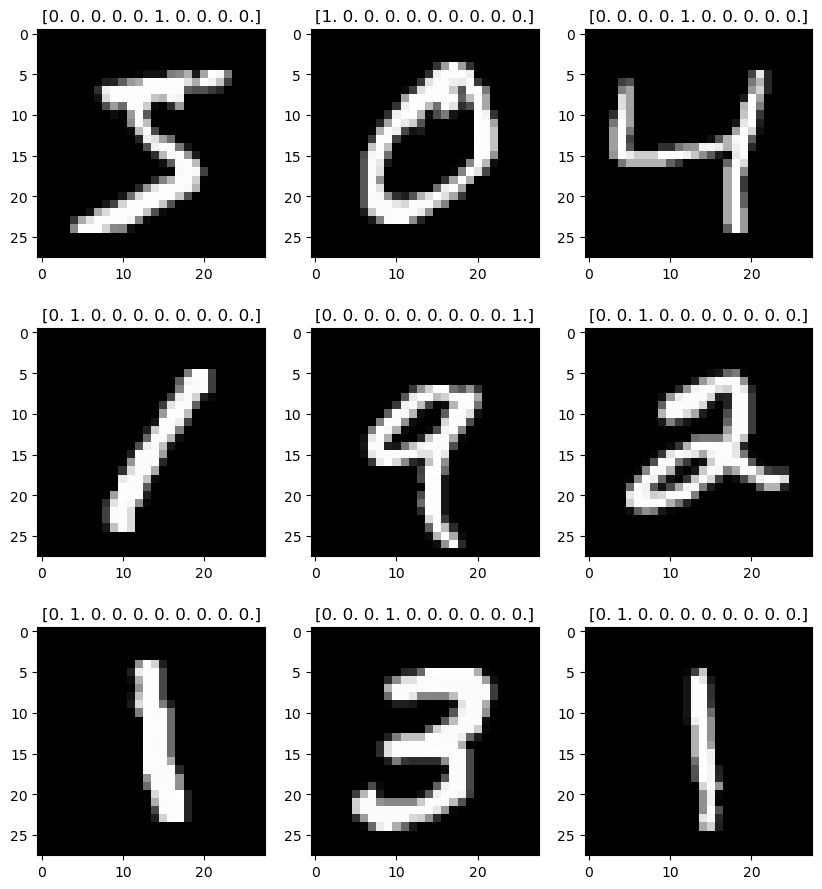

In [11]:
# Plot some images
fig, axs = plt.subplots(3, 3, figsize=(10, 11))
axs = axs.flatten()

for i in range(9):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].set_title(str(y_train[i]))

plt.show()

In [12]:
# We need to normalize the pictures to make it easy for the NN to make the calculation
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

### Plot some images AFTER Normanlization

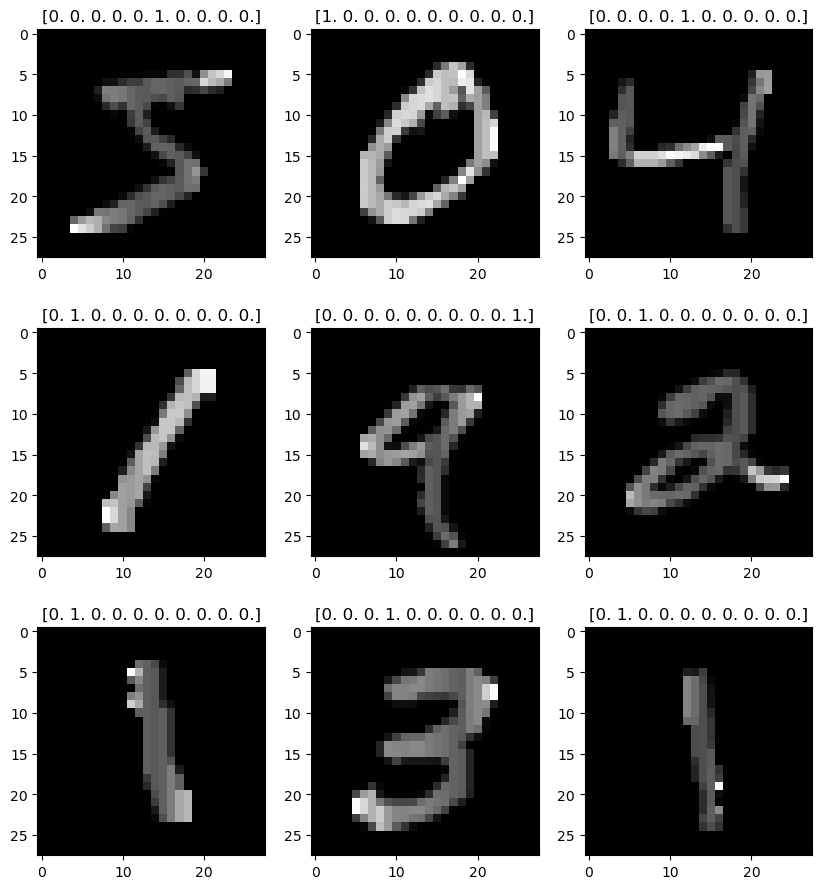

In [13]:
# Plot some images
fig, axs = plt.subplots(3, 3, figsize=(10, 11))
axs = axs.flatten()

for i in range(9):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].set_title(str(y_train[i]))

plt.show()

# Now, After cleaning and normalizing data we will use Machine learning algorithms 

## First: Using Classification 

In [14]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.2085 - accuracy: 0.9350 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0606 - accuracy: 0.9813 - val_loss: 0.0467 - val_accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0459 - val_accuracy: 0.9854
Epoch 4/5
938/938 [==============================] - 29s 30ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0342 - val_accuracy: 0.9888
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0317 - val_accuracy: 0.9902


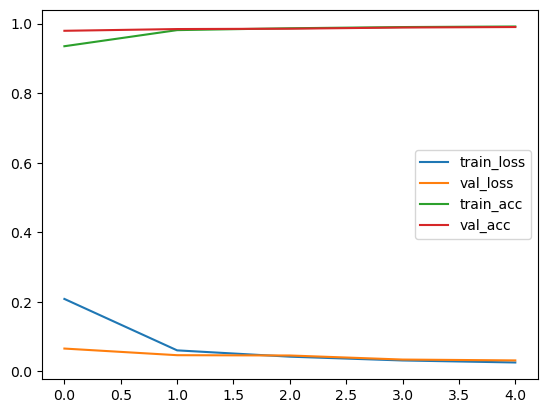

In [17]:
# Plot the learning curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

1/1 [==============================] - 0s 93ms/step


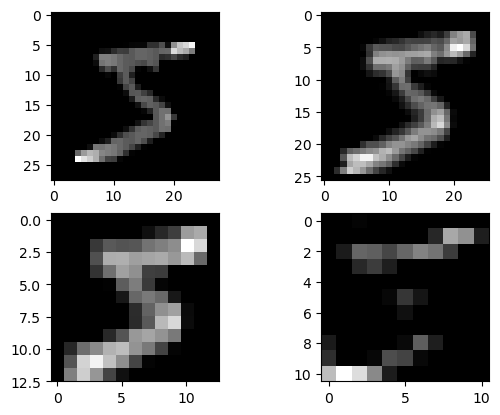

In [18]:
# Visualize the feature maps of the first convolutional layer
layer_outputs = [layer.output for layer in model.layers[:3]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[:1])
plt.subplot(221)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.subplot(222)
plt.imshow(activations[0][0, :, :, 0], cmap='gray')
plt.subplot(223)
plt.imshow(activations[1][0, :, :, 0], cmap='gray')
plt.subplot(224)
plt.imshow(activations[2][0, :, :, 0], cmap='gray')

In [19]:
# Evaluate the model on the test set
loss_Classification, accuracy_Classification = model.evaluate(X_test, y_test)
print('Classification loss:', loss_Classification)
print('Classification accuracy:', accuracy_Classification)

313/313 [==============================] - 2s 5ms/step - loss: 0.0317 - accuracy: 0.9902
Classification loss: 0.03172332048416138
Classification accuracy: 0.9901999831199646


In [20]:
# Evaluate the CNN model on the test set
y_pred_class = model.predict(X_test)
f1_score_class = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred_class, axis=1), average='weighted')
print('Classification model F1-score:', f1_score_class)

313/313 [==============================] - 2s 5ms/step
Classification model F1-score: 0.9901950669887872


## Second: Using Clustring

In [21]:
# Load the dataset
digits = load_digits()

In [22]:
# Preprocess the data
X = digits.data / 255.0
y = digits.target

In [23]:
# Train the clustering algorithm
n_clusters = 10
spectral = SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X)

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=10)

In [24]:
# Project the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

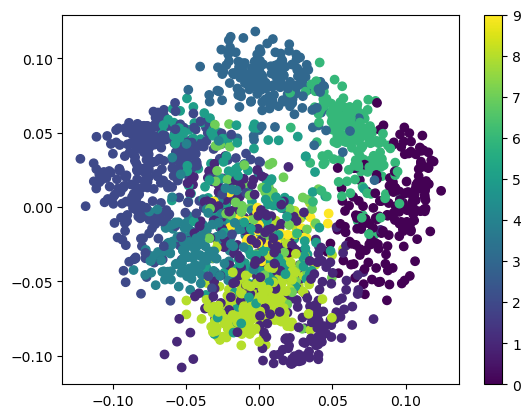

In [25]:
# Plot the data points with different colors based on their assigned cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spectral.labels_)
plt.colorbar()

In [26]:
# Print the predicted labels for a few data points
print("Predicted labels:")
y_pred = []
for i in range(5):
    cluster_label = spectral.labels_[i]
    mask = spectral.labels_ == cluster_label
    counts = np.bincount(y[mask])
    mode = np.argmax(counts)
    y_pred.append(mode)
    print("Data point", i, "predicted label:", mode)

Predicted labels:
Data point 0 predicted label: 0
Data point 1 predicted label: 8
Data point 2 predicted label: 8
Data point 3 predicted label: 3
Data point 4 predicted label: 4


In [27]:
# Evaluate the accuracy of the predicted labels
accuracy_clustering = accuracy_score(y[:5], y_pred)
print("Clustering accuracy:", accuracy_clustering)
plt.show()

Clustering accuracy: 0.6


In [28]:
# Evaluate the accuracy of the predicted labels
f1_score_cluster = f1_score(y[:5], y_pred, average='weighted')
print('Clustering algorithm F1-score:', f1_score_cluster)

Clustering algorithm F1-score: 0.6


In [29]:
# Compare the two accuracies and print the bigger one
if accuracy_Classification > accuracy_clustering:
    print("The Classification model has higher accuracy:", accuracy_Classification)
else:
    print("The Clustering algorithm has higher accuracy:", accuracy_clustering)

The Classification model has higher accuracy: 0.9901999831199646


In [30]:
# Compare the two F1-scores and print the higher one
if f1_score_class > f1_score_cluster:
    print("The lassification model has higher F1-score:", f1_score_class)
else:
    print("The clustering algorithm has higher F1-score:", f1_score_cluster)

The lassification model has higher F1-score: 0.9901950669887872


### So, We got that classification model accuarcy was `0.9904` while the clustring model accuracy is `0.6` so classification is more preffered 

### Testing the model prediction

In [31]:
model.save("classhandwritten.model");

INFO:tensorflow:Assets written to: classhandwritten.model\assets


INFO:tensorflow:Assets written to: classhandwritten.model\assets


In [32]:
model = tf.keras.models.load_model('classhandwritten.model')

In [33]:
predictions = model.predict([X_test])

313/313 [==============================] - 2s 5ms/step


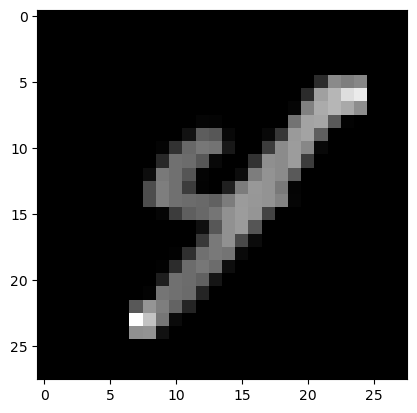

In [34]:
plt.imshow(X_test[670], cmap='gray')
plt.show()

In [35]:
print(np.argmax(predictions[670]))

4
